Dot Product in Numpy

np.dot(a, b) where the first argument is the row and the second argument is the column of the resultant matrix. 
note that the row of arg1 must be the same value as the column of arg2.

Neuron Example with Single Input Example:

In [2]:
import numpy as np
a = [1, 2, 3]
b = [[4, 5, 6], [7, 8, 9], [10, 11, 12]]

dotab = np.dot(a, b)
print(dotab)

[48 54 60]


Given a matrix x = [x1, x2, x3] and w = [w1, w2, w3] we can see how dot product is used on a neuron level.
Neuron formula: output = w1x1 + w2x2+ w3x3 + b where the first 3 terms are just the np.dot(x, w). 


Layer of Neuron with Single Input Example:

In [3]:
x = [1, 2, 3, 4]
w = [[1, 2, 3, 4], [5, 6, 7, 8], [9, 10, 11, 12]]
biases = [2, 3, 4]

dot = np.dot(w, x) + biases
print(dot)

[ 30  70 110]


We do np.dot(w,x) so that each weight sub array is paired with an element in the input array to represent the behaviour of a layer.
Recall layer: 
Neuron 1: (w11, w21, w31, w41) * dot (x1, x2, x3, x4)
Neuron 2: (w12, w22, w32, w42) * dot (x1, x2, x3, x4)
Neuron 3: (w13, w23, w33, w43) * dot (x1, x2, x3, x4)

Layer of Neurons with Batch of Inputs Example:

In [4]:
inputs = [[1, 2, 3, 4], [5, 6, 7, 8], [9, 10, 11, 12]]
weights = [[1, 2, 3, 4], [5, 6, 7, 8], [9, 10, 11, 12]]
biases = [2, 3, 4]

outputs = np.dot(inputs, np.array(weights).T) + biases
print(outputs)

[[ 32  73 114]
 [ 72 177 282]
 [112 281 450]]


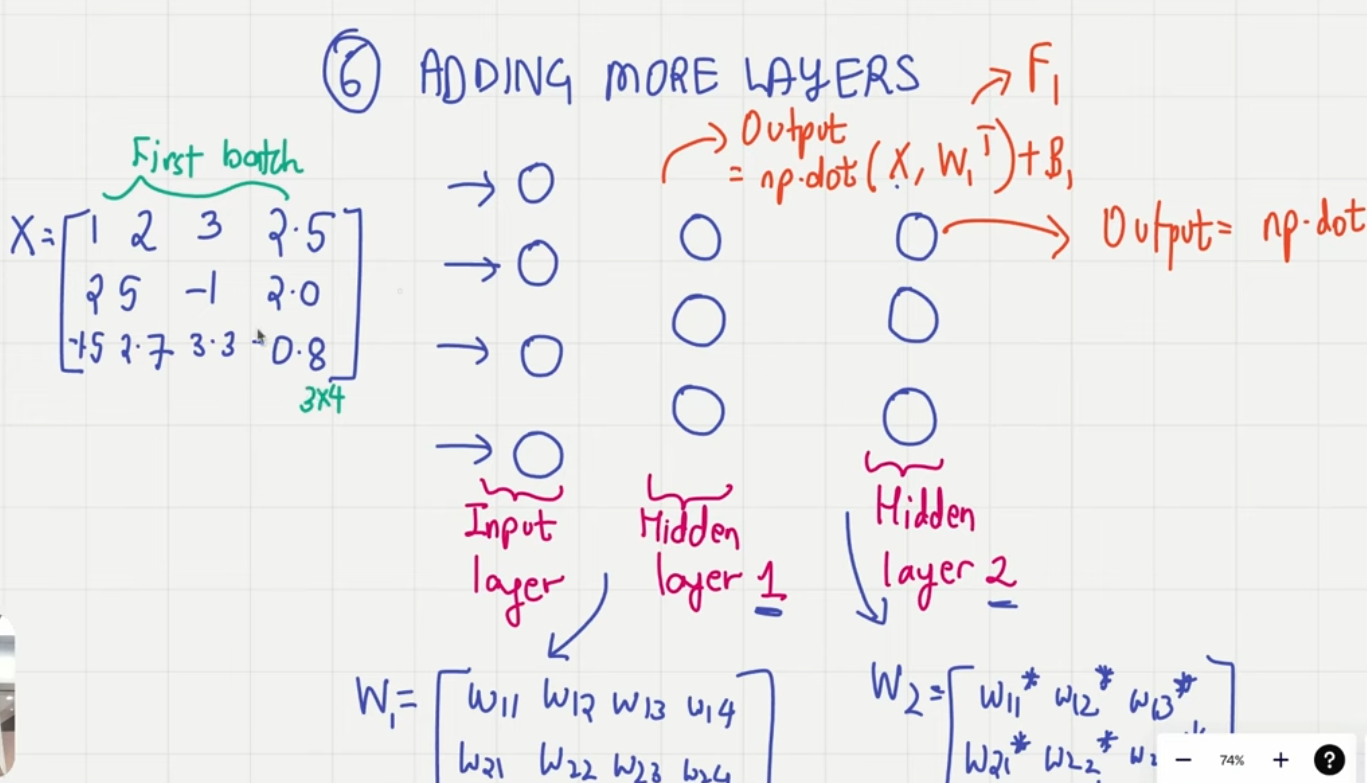

Multiple Layers with Batch of Inputs Example:

In [8]:
#Input layer
inputs = [[1, 2, 3, 4], [5, 6, 7, 8], [9, 10, 11, 12]]
inputs_arr = np.array(inputs)

#First hidden layer
weights1 = [[1, 2, 3, 4], [5, 6, 7, 8], [9, 10, 11, 12]]
biases1 = [2, 3, 4]
weights1_arr = np.array(weights1)
biases1_arr = np.array(biases1)

#Second hidden layer
weights2 = [[1, 2, 3], [5, 6, 7], [9, 10, 11]]
biases2 = [2, 3, 4]
weights2_arr = np.array(weights2)
biases2_arr = np.array(biases2)

outputs_1 = np.dot(inputs_arr, weights1_arr.T) + biases1_arr

outputs_2 = np.dot(outputs_1, weights2_arr.T) + biases2_arr

print(outputs_2)




[[ 522 1399 2276]
 [1274 3399 5524]
 [2026 5399 8772]]


Practice with 4 Layers:

In [11]:
#Input layer
inputs = [[1, 2, 3, 4], [5, 6, 7, 8], [9, 10, 11, 12]]
inputs_arr = np.array(inputs)

#First hidden layer
weights1 = [[1, 2, 3, 4], [5, 6, 7, 8], [9, 10, 11, 12]]
biases1 = [2, 3, 4]
weights1_arr = np.array(weights1)
biases1_arr = np.array(biases1)

#NOTE: Output will be 3x4 when np.dot(x,w) is performed due to ~np.dot(rows x, cols weights1) 
outputs_1 = np.dot(inputs_arr, weights1_arr.T) + biases1_arr

#Second hidden layer
weights2 = [[1, 2, 3], [5, 6, 7], [9, 10, 11]]
biases2 = [2, 3, 4]
weights2_arr = np.array(weights2)
biases2_arr = np.array(biases2)

#NOTE: Output will be 3x3 when np.dot(x,w) is performed due to ~np.dot(rows Output1, cols weights2)
outputs_2 = np.dot(outputs_1, weights2_arr.T) + biases2_arr

#Third hidden layer
weights3 = [[1, 2, 3], [5, 6, 7], [9, 10, 11]]
biases3 = [2, 3, 4]
weights3_arr = np.array(weights2)
biases3_arr = np.array(biases2)

#NOTE: Output will be 3x3 when np.dot(x,w) is performed due to ~np.dot(rows Output2, cols weights3)
outputs_3 = np.dot(outputs_2, weights3_arr.T) + biases3_arr

#Fourth hidden layer
weights4 = [[1, 2, 3], [5, 6, 7], [9, 10, 11]]
biases4 = [2, 3, 4]
weights4_arr = np.array(weights2)
biases4_arr = np.array(biases2)

#NOTE: Output will be 3x3 when np.dot(x,w) is performed due to ~np.dot(rows Output3, cols weights4)
outputs_4 = np.dot(outputs_3, weights4_arr.T) + biases4_arr
print(outputs_4)


[[ 195214  518483  841752]
 [ 474190 1259411 2044632]
 [ 753166 2000339 3247512]]


Representing Layers as Classes:

In [ ]:
from nnfs.datasets import spiral_data
import numpy as np
import nnfs
import matplotlib.pyplot as plt

nnfs.init()
x, y = spiral_data(samples = 100, classes =3)
plt.scatter(x[0: 50], y[0: 50])

Dense Layer Class:
Specifications: 
1. given number of layers and neurons it should create an output
2. assign random weights and biases to each neuron

In [23]:
from numpy import random as r

class Layer_Dense:
    def __init__(self, inputs, neurons):
        # self.inputs = []
        # for i in range(inputs):
        #     self.inputs.append(0.01 * r.rand())
        # self.neurons = []
        # self.biases = []
        # for i in range(neurons):
        #     weight = []
        #     for j in range(inputs):
        #         weight.append(0.01* r.rand())
        #     self.neurons.append(weight)
        #     self.biases.append(0.01 * r.rand())
        self.weights = 0.01 * r.randn(inputs, neurons)
        self.biases = np.zeros((1, neurons))

    def forward(self, inputs):
        self.output = np.dot(inputs, self.weights) 
    
x, y = spiral_data(samples = 100, classes =3)
dense1 = Layer_Dense(2, 3)
dense1.forward(x)
print(dense1.output[:125])

[[ 0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [-1.22037512e-04  1.07546752e-04 -1.59890158e-04]
 [-2.28374949e-04  1.62040640e-04 -3.59113415e-04]
 [-3.32478026e-04  2.13963984e-04 -5.56328043e-04]
 [-1.78921051e-04 -2.41598595e-04 -8.44298047e-04]
 [-1.42012286e-05 -5.92945551e-04 -9.43430117e-04]
 [-7.22594559e-04  6.08899572e-04 -9.89330467e-04]
 [-3.15822865e-04 -4.18568437e-04 -1.47826306e-03]
 [-5.71960874e-04 -1.21454032e-04 -1.70480122e-03]
 [-1.17100040e-04 -9.51257825e-04 -1.76406931e-03]
 [-2.01289549e-05 -1.19604566e-03 -1.88039441e-03]
 [-3.75588221e-04 -8.40546447e-04 -2.28157570e-03]
 [-9.95105715e-04  8.05456875e-05 -2.52024014e-03]
 [-6.17810350e-04 -7.28151761e-04 -2.75330385e-03]
 [-4.27136605e-04 -1.14376168e-03 -2.88165500e-03]
 [-5.01018658e-04 -1.16253528e-03 -3.10658198e-03]
 [ 1.81700697e-03 -3.12912301e-03  4.68165235e-05]
 [ 2.96352064e-05 -2.11057975e-03 -3.14513245e-03]
 [ 5.81875036e-04 -2.83093844e-03 -2.77856109e-03]
 [ 4.10258130e-04 -2.78266706e-

Activation Functions:

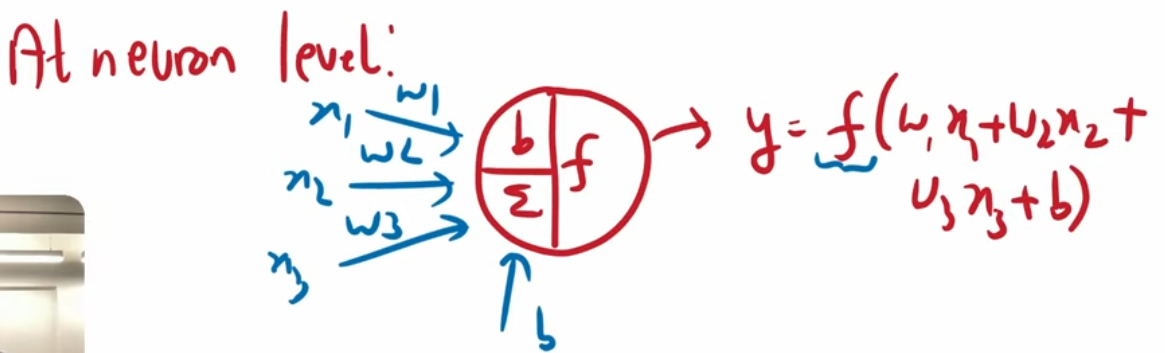

Activation functions basically introduce non-linearity to the neural network, as without them outputs would just be a linear combination of the inputs and weights. This means without activation functions, forward pass would just result in an output that is linearly related to the input. 
This is not ideal as it would limit the NNs ability to represent non-linear relationships which are more common and harder to compute analytically.

I. Sigmoid Function:

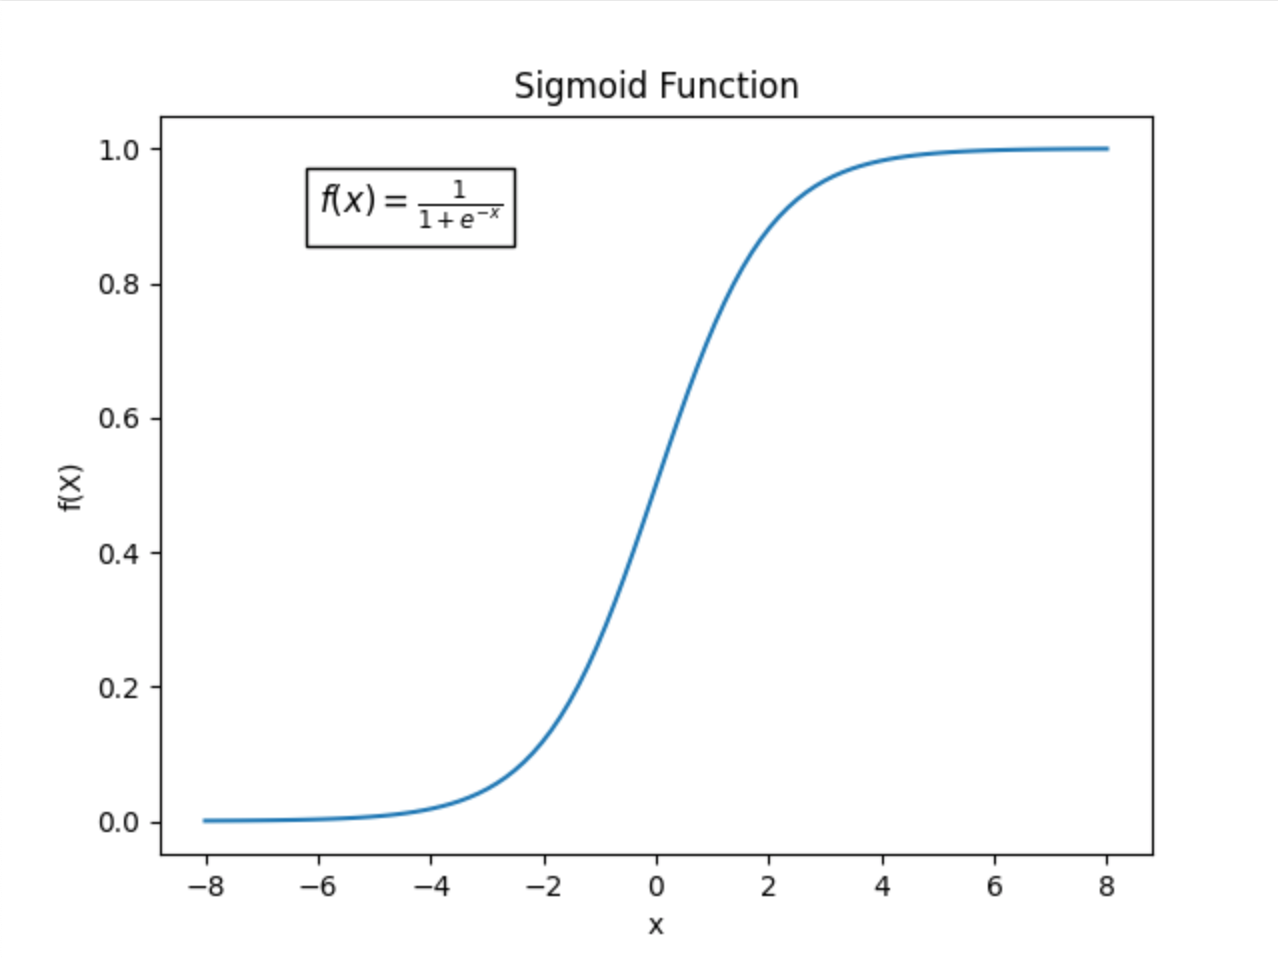

Pros: Good for binary classification due to shape of the function, continuous smooth so can be differentiable for all x (this is useful for gradient descent where we differentiate the activation functions to calculate the loss function)

Cons: The derivative at the ends approaches 0 due to the end behaviour. This means gradient descent for high and low x values is 0. This is known as the vanishing gradient problem.

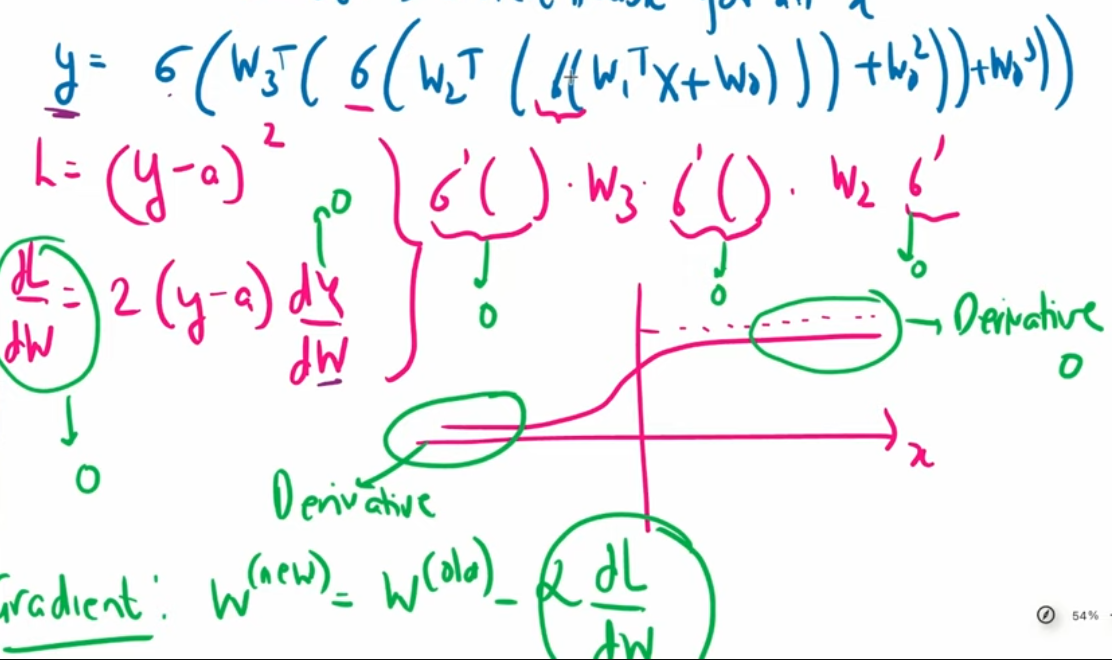

As seen above, when we perform gradient descent on the sigmas (activation functions) in the functionality representation (blue) if the x value you take the derivative at is too extreme, you will end up with the Loss function output as 0.

Block representation of a neural network vs a function representation of a neural network:
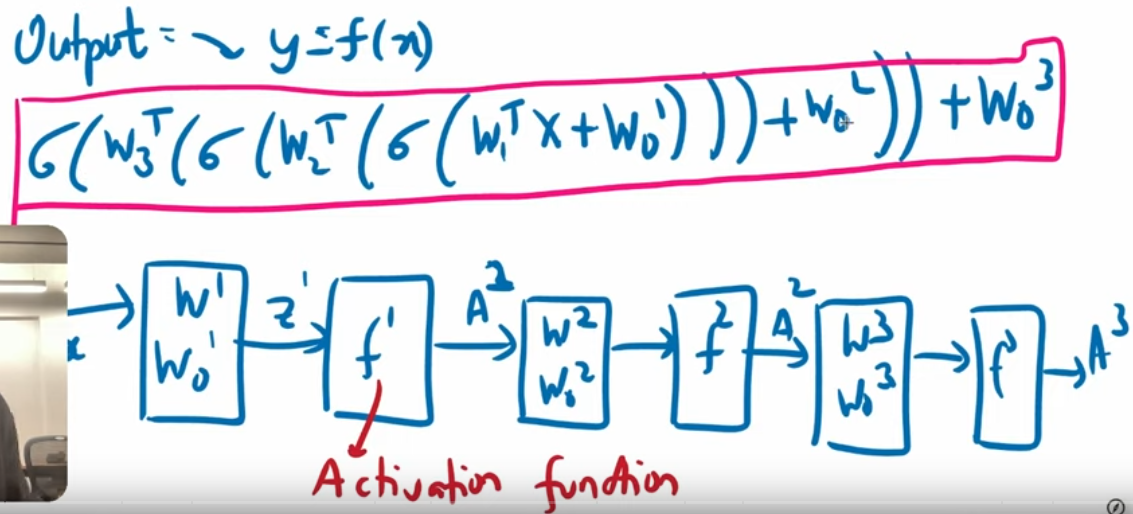

All neural networks are just functions (long functions)!

II. Tanh(x): y = 2 / (1 + e^-2x) - 1

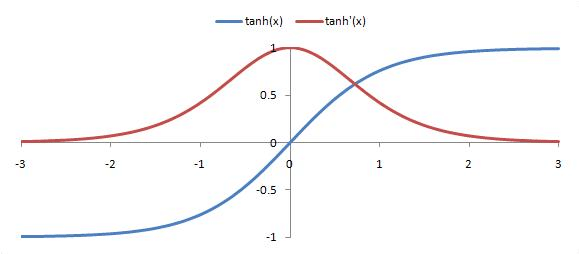
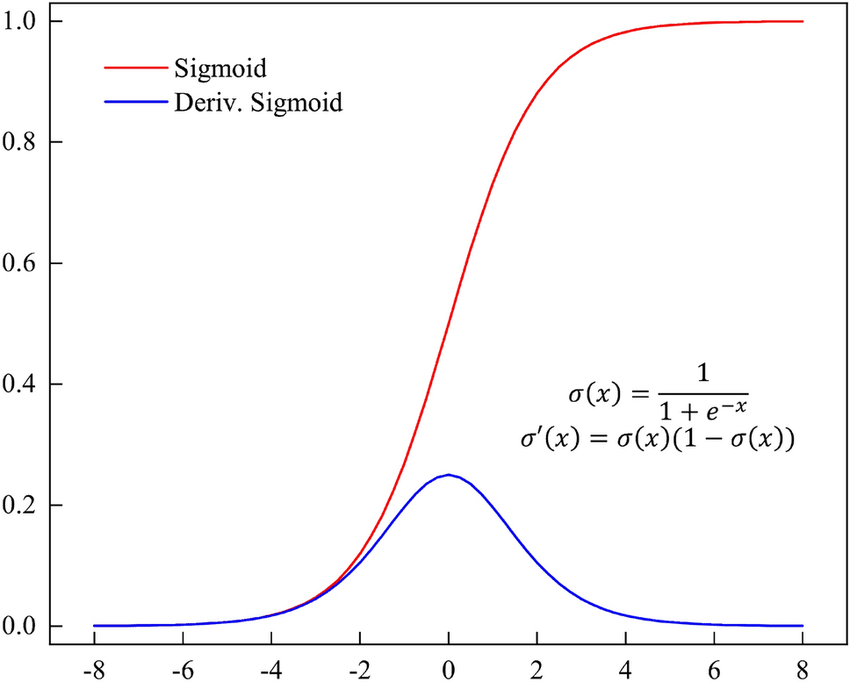
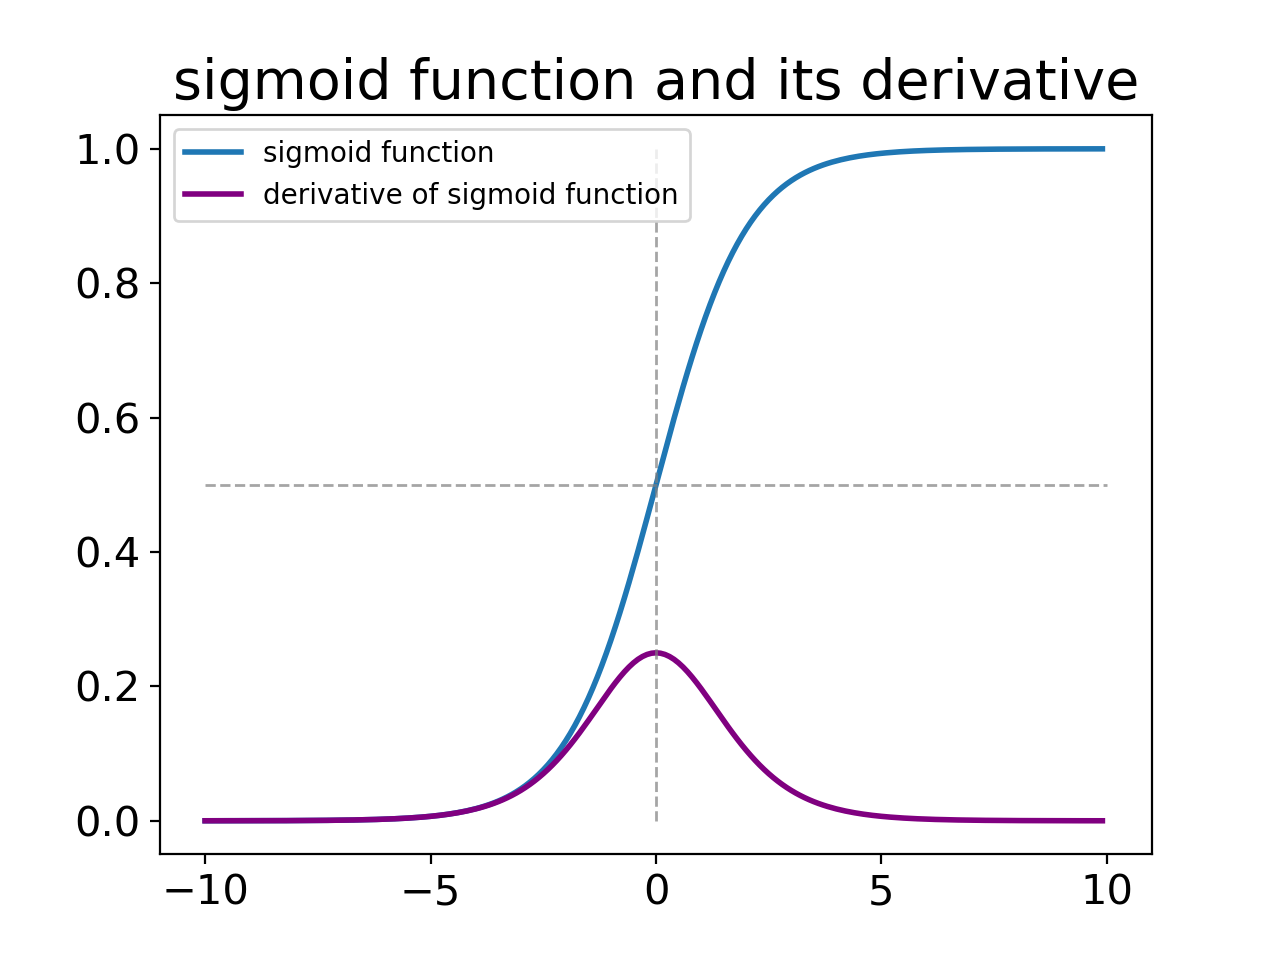

Pros: 
1. more extreme behavior resulting in higher variation in derivatives than sigmoid
The variation in derivatives results in faster computation time since the back prop. can make adjustments faster with more sensitive activation function derivatives. This is why tanh is preferred to sidmoids these days. The only exception is in the final layer for binary classification which uses sigmoid since the range of 0 to 1 can be mapped to probabilities whereas (-1 -> 1) for tanh cannot be mapped to probabilities

2. Centered on 0 and can take negative more effectively since it will map them to negative outputs unlike sigmoid which will just associate most negative values with 0.

Cons: Vanishing gradient problem

III. ReLU - Rectified Linear Unit

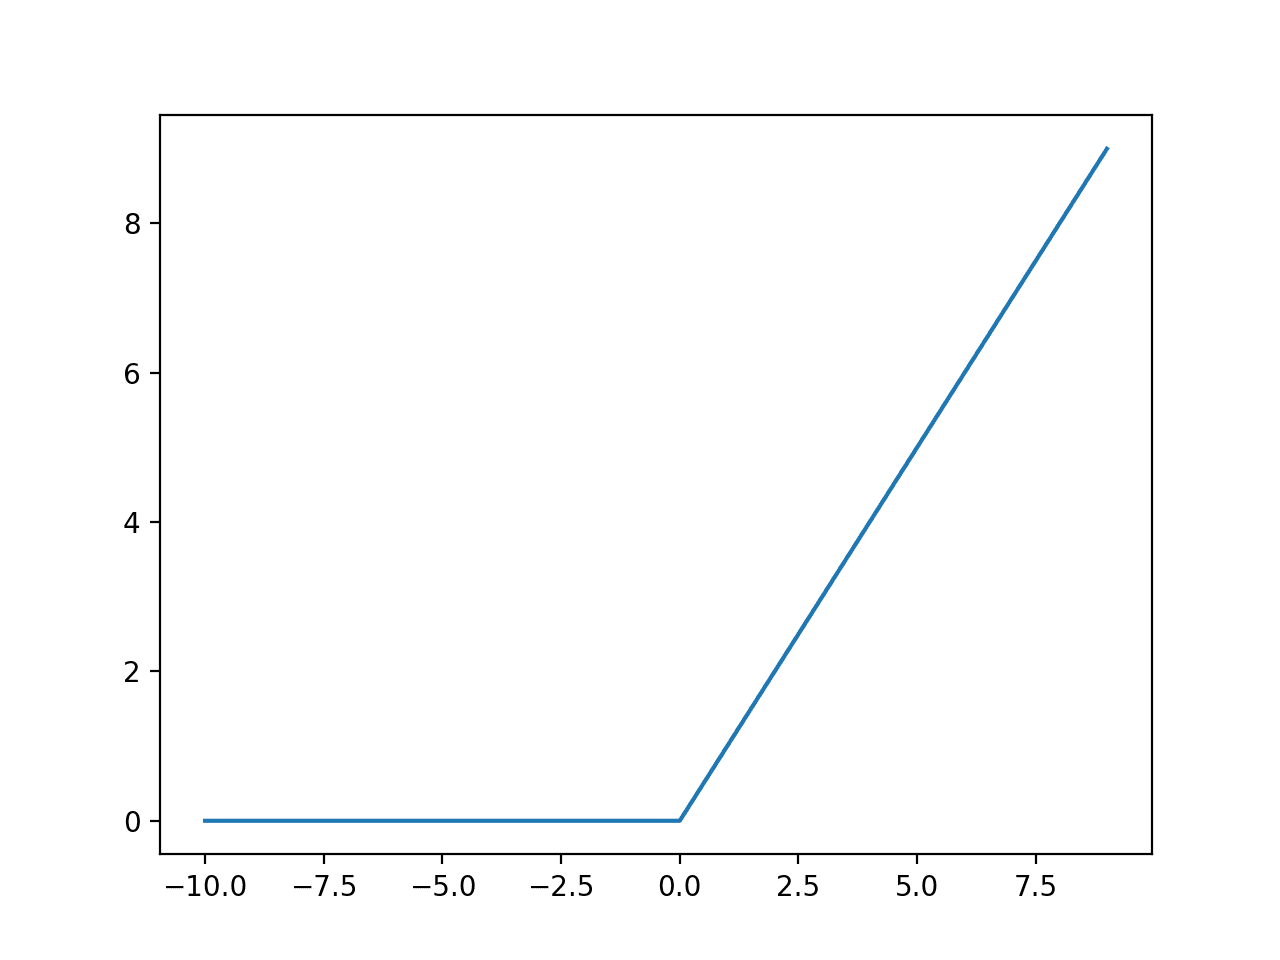

Pros: 

1. Solves vanishing gradient problem for all positive x which means loss function wont get stuck as much

2. Generally has faster training since the function is more simple than Sigmoid and Tanh.

3. Output is also not in a specific range which is a unique trait to ReLU compared to Sigmoid and Tanh.

Cons:

1. Cannot handle negative inputs. Negative inputs will result in no changes to the loss function, so the weights cant update in back propagation. In addition, the output is also 0 so the neuron is doing nothing. This is called the dead neuron problem.

Side note: Even if some neurons end up dead, with large NNs its fine since as long as the majority of the neurons are functional the NN will update. Therefore this con is not that bad considering the pros.

IV. Leaky ReLU

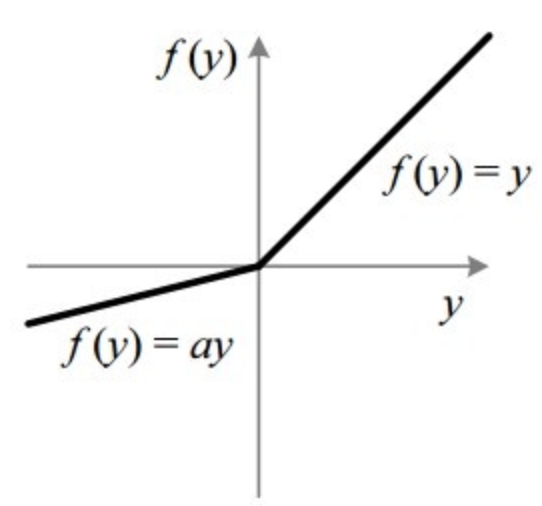

Solves the dead neuron problem while still keeping the benefits of ReLU

V. Softmax

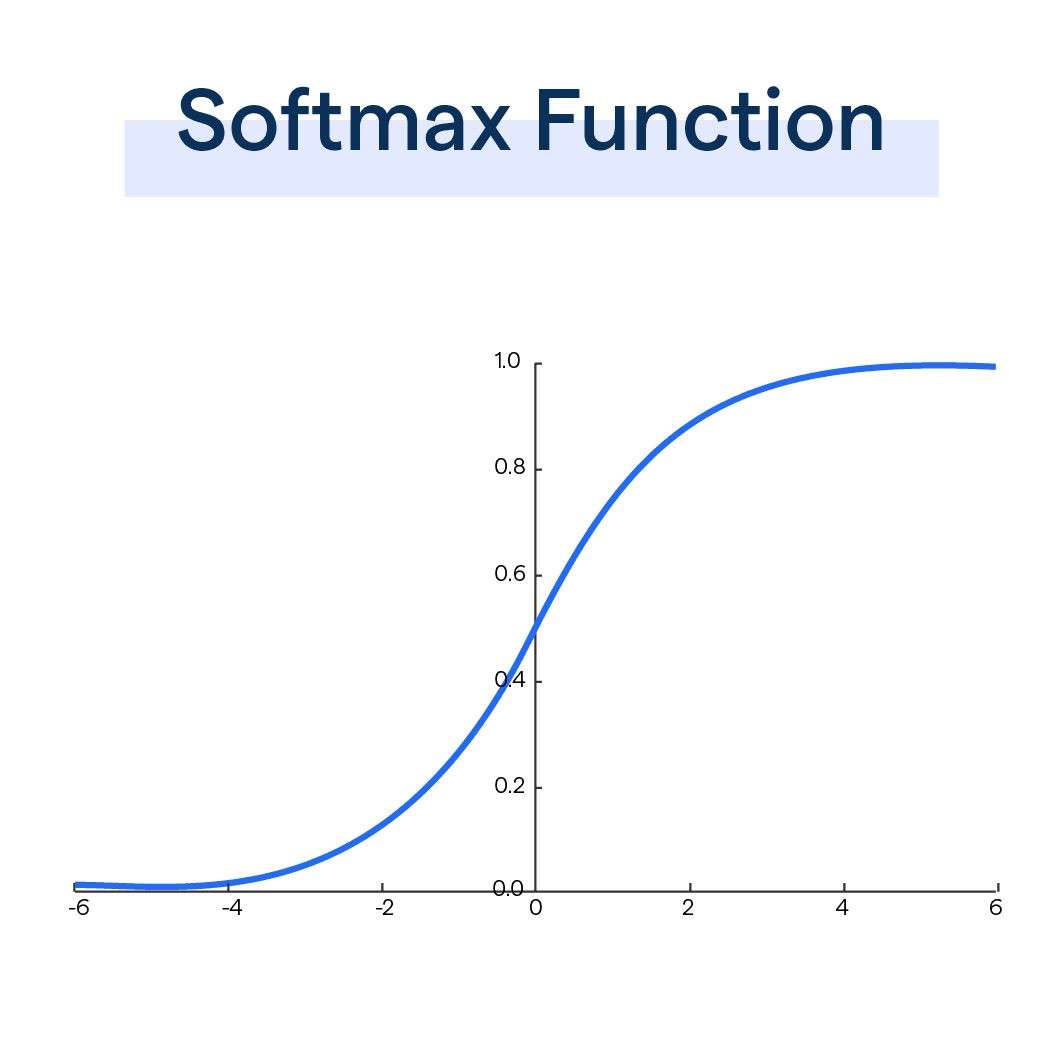
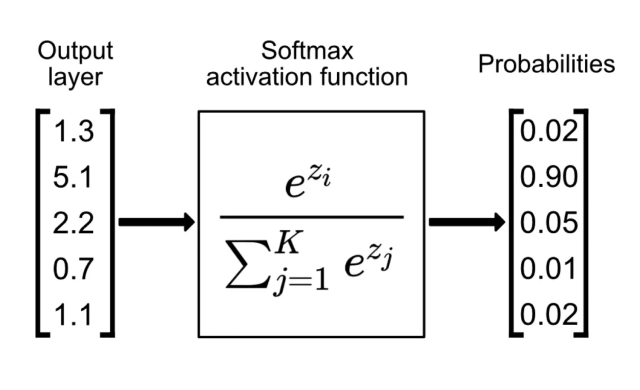

Maps outputs to probabilities by normalizing them (in the above img z is an element in the vector).

The advantage of this is when doing multiple classifications and the output of a neuron might contain some value for similarity to different classes. Softmax will just map them to probabilities.

The mapping is adjusted by using e. This ensures that higher values get pushed up in value while low values are further diminished. This can best be seen in how 5.1 and 2.2 tranform to 0.90 and 0.05 where the difference between initial and final is increased by a lot.

This ensures the softmax function is more sensitive to changes which will increase the effectiveness of a single back propagation.

Pros:
1. Very effective and multiple classification as described above.
2. Does not totally discard non max values like the conventional .MAX() function but rather discourages and encourages the model on certain values.

Cons:
1. Most computationally intensive method thus far due to summation method and having to repeat this function for all elements in the output. This can be fine for smaller outputs but grows "exponentially" with greater outputs.

VI. Swish: y(x) = x*Sigmoid(x)

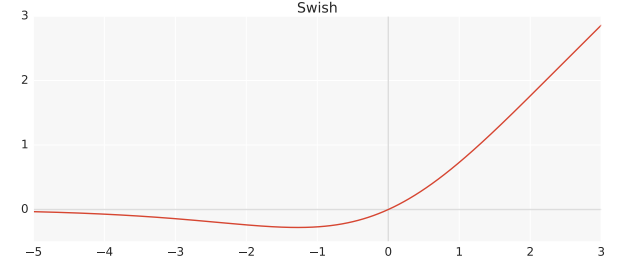

Pros: 
1. Solves vanishing gradient on the positive end

